In [1]:
%matplotlib inline
import librosa, librosa.display
import IPython.display as ipd
import vamp
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack as fft

In [2]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pprint = pp.pprint

In [3]:
beatles_live = librosa.load('/home/sonja/Dropbox/RC/Passive ear trainer/Songs/Beatles - I wanna hold your hand - live.m4a')
beatles = librosa.load('/home/sonja/Dropbox/RC/Passive ear trainer/Songs/Beatles - I wanna hold your hand -studio.m4a')

In [4]:
beatles[0].shape

(3215184,)

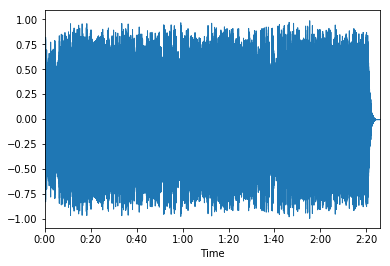

In [5]:
librosa.display.waveplot(beatles[0])

In [6]:
ipd.Audio(beatles[0], rate = beatles[1])

In [7]:
vamp.list_plugins()


['nnls-chroma:chordino', 'nnls-chroma:nnls-chroma', 'nnls-chroma:tuning']

In [8]:
chords = vamp.collect(beatles[0], beatles[1], "nnls-chroma:chordino")

In [9]:
pprint(list(enumerate(chords['list'])))

[   (0, {'label': 'N', 'timestamp':  0.371519274}),
    (1, {'label': 'D', 'timestamp':  0.557278911}),
    (2, {'label': 'G6', 'timestamp':  7.151746031}),
    (3, {'label': 'D6', 'timestamp':  9.845260770}),
    (4, {'label': 'E', 'timestamp':  11.331337868}),
    (5, {'label': 'G', 'timestamp':  14.953650793}),
    (6, {'label': 'D6', 'timestamp':  16.625487528}),
    (7, {'label': 'E', 'timestamp':  18.390204081}),
    (8, {'label': 'Bm', 'timestamp':  20.340680272}),
    (9, {'label': 'D7', 'timestamp':  22.198276643}),
    (10, {'label': 'Cmaj7', 'timestamp':  24.148752834}),
    (11, {'label': 'G', 'timestamp':  26.563628117}),
    (12, {'label': 'Dmaj7', 'timestamp':  31.021859410}),
    (13, {'label': 'E', 'timestamp':  32.879455782}),
    (14, {'label': 'G', 'timestamp':  36.594648526}),
    (15, {'label': 'Dmaj7', 'timestamp':  38.173605442}),
    (16, {'label': 'E', 'timestamp':  40.031201814}),
    (17, {'label': 'Bm', 'timestamp':  42.074557823}),
    (18, {'label': 'Cmaj

In [10]:
chord_pairs = list(zip(chords['list'][:-1], chords['list'][1:]))
timestamps = [[float(c[0]['timestamp']), float(c[1]['timestamp'])] for c in chord_pairs]
bounds = [librosa.time_to_samples(t, beatles[1]) for t in timestamps]

chord_number = 11
print(chords['list'][chord_number]['label'], bounds[chord_number])
ipd.Audio(beatles[0][bounds[chord_number][0]:bounds[chord_number][1]], rate=beatles[1])

G [585727 684031]


In [11]:
list(chords[:-1])

TypeError: unhashable type: 'slice'

In [ ]:
last_chord_index = -1
while chords['list'][last_chord_index]['label'] == 'N':
    last_chord_index -= 1
last_chord = chords['list'][last_chord_index]['label']
print(last_chord)

In [ ]:
for chord in chords['list']:
    print(chord)

In [ ]:
numb_appearance_chord = {}
for chord in chords['list']:
    numb_appearance_chord.setdefault(chord['label'], 0)
    numb_appearance_chord[chord['label']] += 1
print(numb_appearance_chord)
most_appearing_chord = ('', 0)
#for chord in numb_appearance_chord:
    


In [ ]:
import collections
list_of_chords = [chord['label'] for chord in chords['list']]
numb_appearance_chord2 = collections.Counter(list_of_chords)
print(numb_appearance_chord2)
most_appearing_chord = numb_appearance_chord2.most_common(1)
print(most_appearing_chord)

In [ ]:
chromagram = librosa.feature.chroma_stft(beatles[0], sr=beatles[1], hop_length=512)
plt.figure(figsize=(15, 5))
chromagram = np.log10(1+10*abs(chromagram))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')

In [ ]:
X = librosa.stft(beatles[0], n_fft=1024, hop_length=512) #raw ft output (complex), n_fft is window-length, ft is with respect to n_fft

In [ ]:
librosa.display.specshow(X, x_axis='time', hop_length=512) #displaying spectrogram

In [ ]:
Xfilt = np.array([v if i < 25 else np.zeros(X.shape[1]) for i, v in enumerate(X)]) #filtering out frequencies below 270Hz

In [ ]:
Xfilt

In [ ]:
audio = librosa.istft(Xfilt, win_length=1024, hop_length=512)

In [ ]:
ipd.Audio(audio, rate = beatles[1])

In [ ]:
# Xdb = librosa.amplitude_to_db(abs(Xfilt)) #length of X after scaling
Xdb = abs(Xfilt)

In [ ]:
librosa.display.specshow(Xdb, x_axis='time', y_axis='log', hop_length=512) #display log spectrogram

In [ ]:
Xdb.shape

In [ ]:
librosa.fft_frequencies(n_fft=1024) #start frqeuency of bins in ft output for n_fft=1024

In [ ]:
chroma_filters = librosa.filters.chroma(beatles[1], 1024)

In [ ]:
bass_chromagram = np.array([np.dot(chroma_filters, frame) for frame in Xdb.transpose()]).transpose()

In [ ]:
librosa.display.specshow(bass_chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')

In [ ]:
weights = [np.sum(bin) for bin in bass_chromagram]
weights /= np.max(weights)
print(weights)

In [ ]:
librosa.display.specshow(np.array([weights]).transpose(), x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')

In [ ]:
ipd.Audio(beatles[0], rate = beatles[1])

In [ ]:
chromagram[0]

In [ ]:
weights = [np.sum(bin) for bin in chromagram]
weights /= np.max(weights)
print(weights)

In [ ]:
librosa.display.specshow(np.array([weights]).transpose(), x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')

In [ ]:
librosa.core.stft(beatles[0], n_fft=len(beatles[0])-1, hop_length=len(beatles[0])-1)

In [ ]:
print(chroma)

In [ ]:
S=chromadata.transpose()
librosa.display.specshow(S, sr=beatles[1], hop_length=2056, x_axis='time')
plt.colorbar()
plt.figure(figsize=(5, 50))